In [ ]:
!pip install flask pyngrok

In [ ]:
!pip install flask gunicorn pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 1.7 MB/s eta 0:00:00


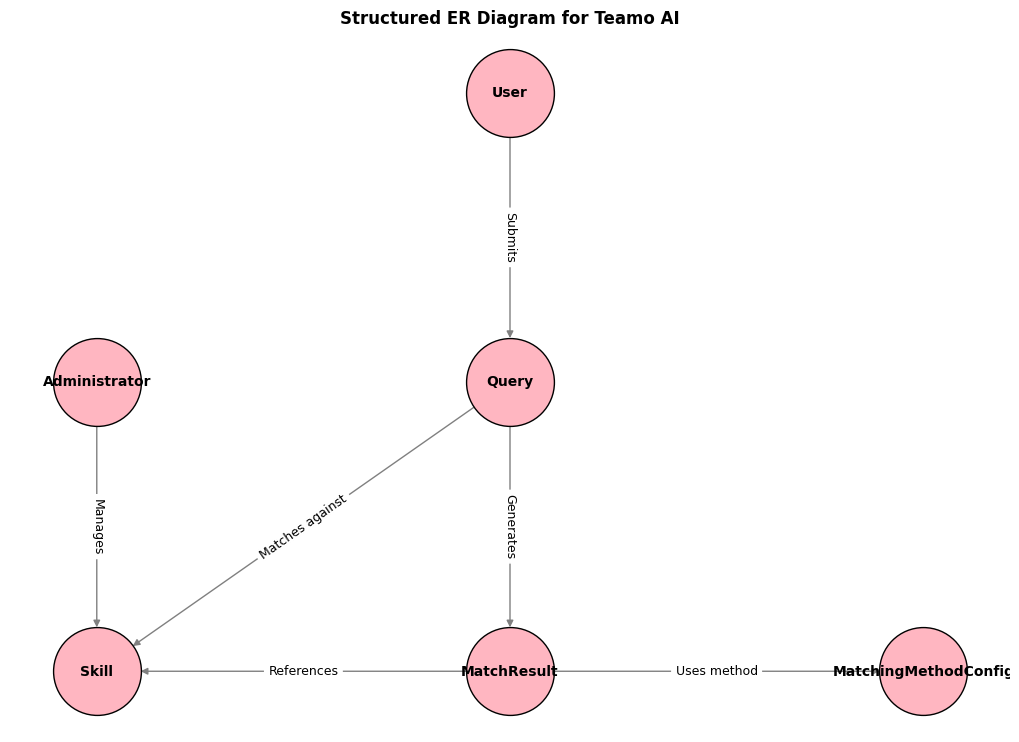

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define entities (nodes)
entities = {
    "User": "Sends queries",
    "Query": "Contains user-submitted skills",
    "MatchResult": "Stores matched skills & methods",
    "Administrator": "Manages the predefined skills",
    "Skill": "Predefined skills list",
    "MatchingMethodConfig": "Stores matching methods"
}

# Define relationships (edges) with labels
relationships = {
    ("User", "Query"): "Submits",
    ("Query", "MatchResult"): "Generates",
    ("Administrator", "Skill"): "Manages",
    ("Query", "Skill"): "Matches against",
    ("MatchResult", "Skill"): "References",
    ("MatchResult", "MatchingMethodConfig"): "Uses method"
}

# Add nodes and edges to the graph
G.add_nodes_from(entities.keys())
G.add_edges_from(relationships.keys())

# Define hierarchical layout
pos = {
    "User": (0, 3),
    "Query": (0, 2),
    "MatchResult": (0, 1),
    "MatchingMethodConfig": (2, 1),
    "Administrator": (-2, 2),
    "Skill": (-2, 1)
}

# Draw the graph with improved layout and pink aesthetics
plt.figure(figsize=(10, 7))
nx.draw(
    G, pos, with_labels=True, node_color="#FFB6C1", edge_color="gray",
    node_size=4000, font_size=10, font_weight="bold", edgecolors="black"
)

# Draw edge labels
edge_labels = {edge: label for edge, label in relationships.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_color="black")

# Display the ER diagram
plt.title("Structured ER Diagram for Teamo AI", fontsize=12, fontweight="bold", color="black")
plt.show()

In [ ]:
%%writefile app.py
from flask import Flask, request, jsonify
from difflib import SequenceMatcher

app = Flask(__name__)

# Administrator's predefined skill list
skill_list = ['Python', 'relational database', 'Software engineering', 'data science', 'NLP', 'natural language processing']

def get_similarity(a, b):
    """Calculate similarity score between two skill names."""
    return SequenceMatcher(None, a.lower(), b.lower()).ratio()

@app.route('/match_skill', methods=['POST'])
def match_skill():
    """API endpoint to match a user-submitted skill with the administrator's skill list."""
    data = request.get_json()
    user_query = data.get("skill", "").strip()

    if not user_query:
        return jsonify({"error": "No skill provided"}), 400

    match_results = []
    for skill in skill_list:
        score = get_similarity(user_query, skill)
        if score > 0.5:
            match_results.append({
                "matched_skill": skill,
                "matching_method": "text_similarity"  # This is visible in the response
            })
            # Internal storage (not included in response, but stored in backend)
            print(f"MatchResult - Skill: {skill}, Matching Method: text_similarity, Internal Matching Score: {round(score, 2)}")

    match_results.sort(key=lambda x: x['matched_skill'], reverse=True)

    return jsonify({"user_query": user_query, "match_results": match_results})


Writing app.py


In [ ]:
!gunicorn -w 4 -b 0.0.0.0:5000 app:app --daemon

In [ ]:
!ngrok authtoken 2sxMHd0mboMcs8el6NdxBbwd7tM_5SGbn7cy3ydy6DUhf8UG5

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Kill any existing tunnels
ngrok.kill()

# Create a new ngrok tunnel
public_url = ngrok.connect(5000)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://1d40-34-133-18-248.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
!curl -X POST https://1d40-34-133-18-248.ngrok-free.app/match_skill -H "Content-Type: application/json" -d '{"skill": "data science"}'


{"match_results":[{"matched_skill":"data science","matching_method":"text_similarity"}],"user_query":"data science"}
